# Calculation of back allocation using machine learning

## Importing necessary libraries

In [126]:
import pandas as pd
import seaborn as sns
#ignore warnings
import warnings
warnings.filterwarnings('ignore')

## Loading data

In [127]:
df_well1 = pd.read_excel('datasets\well1.xlsx', sheet_name='Full History', header=2)
df_well2 = pd.read_excel('datasets\well2.xlsx', sheet_name='Full History', header=2)
df_well3 = pd.read_excel('datasets\well3.xlsx', sheet_name='Full History', header=2)
df_well4 = pd.read_excel('datasets\well4.xlsx', sheet_name='Full History', header=2)


In [128]:
df_well1.head()

,Ir. Calender,Eng. Calender,"Choke(/64"")",WHT (0C),WHP (psig),WHP (barg),Oil Rate (STBD),∆Q (STBD),Water Rate(sbwpd),BS&W,...,Unnamed: 17,Unnamed: 18,Unnamed: 19,Unnamed: 20,Unnamed: 21,Unnamed: 22,Unnamed: 23,Unnamed: 24,Unnamed: 25,Unnamed: 26
0,1999-01-18 00:00:00,1999-01-19,44.0,76.4,1785.58,123.143448,7409.0,NaN,3.29,0.044386,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
1,1999-02-05 00:00:00,1999-01-20,50.0,NaN,1683.38,116.095172,9205.0,1796.0,0.00,0.000000,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
2,1999-02-06 00:00:00,1999-01-21,55.0,NaN,1566.58,108.040000,10454.0,1249.0,0.00,0.000000,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
3,1999-02-08 00:00:00,1999-01-22,55.0,NaN,1576.80,108.744828,10006.0,-448.0,0.00,0.000000,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
4,1999-02-09 00:00:00,1999-01-25,55.0,NaN,1575.34,108.644138,9877.0,-129.0,0.00,0.000000,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN


In [129]:
#selecting columns with proper names only
df_well1 = df_well1[['Ir. Calender', 'Eng. Calender', 'Choke(/64")', 'WHT (0C)',
       'WHP (psig)', 'WHP (barg)', 'Oil Rate (STBD)', '∆Q (STBD)',
       'Water Rate(sbwpd)', 'BS&W', 'Gas Rate (mscfd)', 'GOR', 'API']]
df_well2 = df_well2[['Ir. Calender', 'Eng. Calender', 'Choke(/64")', 'WHT (0C)',
       'WHP (psig)', 'WHP (barg)', 'Oil Rate (STBD)', '∆Q (STBD)',
       'Water Rate(sbwpd)', 'BS&W', 'Gas Rate (mscfd)', 'GOR', 'API']]
df_well3 = df_well3[['Ir. Calender', 'Eng. Calender', 'Choke(/64")', 'WHT (0C)',
       'WHP (psig)', 'WHP (barg)', 'Oil Rate (STBD)', '∆Q (STBD)',
       'Water Rate(sbwpd)', 'BS&W', 'Gas Rate (mscfd)', 'GOR', 'API']]
df_well4 = df_well4[['Ir. Calender', 'Eng. Calender', 'Choke(/64")', 'WHT (0C)',
       'WHP (psig)', 'WHP (barg)', 'Oil Rate (STBD)', '∆Q (STBD)',
       'Water Rate(sbwpd)', 'BS&W', 'Gas Rate (mscfd)', 'GOR', 'API']]
df_well1.head()

,Ir. Calender,Eng. Calender,"Choke(/64"")",WHT (0C),WHP (psig),WHP (barg),Oil Rate (STBD),∆Q (STBD),Water Rate(sbwpd),BS&W,Gas Rate (mscfd),GOR,API
0,1999-01-18 00:00:00,1999-01-19,44.0,76.4,1785.58,123.143448,7409.0,NaN,3.29,0.044386,6936.0,936.158726,NaN
1,1999-02-05 00:00:00,1999-01-20,50.0,NaN,1683.38,116.095172,9205.0,1796.0,0.00,0.000000,9420.0,1023.356871,NaN
2,1999-02-06 00:00:00,1999-01-21,55.0,NaN,1566.58,108.040000,10454.0,1249.0,0.00,0.000000,10812.0,1034.245265,NaN
3,1999-02-08 00:00:00,1999-01-22,55.0,NaN,1576.80,108.744828,10006.0,-448.0,0.00,0.000000,10832.0,1082.550470,NaN
4,1999-02-09 00:00:00,1999-01-25,55.0,NaN,1575.34,108.644138,9877.0,-129.0,0.00,0.000000,10976.0,1111.268604,NaN


## Data cleaning and EDA

### Well 1

In [130]:
df_well1.shape

(191, 13)

In [131]:
df_well1.isnull().sum()

Ir. Calender           0
Eng. Calender         13
Choke(/64")           96
WHT (0C)              22
WHP (psig)             0
WHP (barg)             0
Oil Rate (STBD)        0
∆Q (STBD)              1
Water Rate(sbwpd)      5
BS&W                   0
Gas Rate (mscfd)       6
GOR                    1
API                  176
dtype: int64

In [132]:
## since choke and API has null values more than 50% of data we can drop these columns
df_well1 = df_well1.drop(['Choke(/64")','API' ], axis=1)

In [133]:
df_well1

,Ir. Calender,Eng. Calender,WHT (0C),WHP (psig),WHP (barg),Oil Rate (STBD),∆Q (STBD),Water Rate(sbwpd),BS&W,Gas Rate (mscfd),GOR
0,1999-01-18 00:00:00,1999-01-19,76.4,1785.58,123.143448,7409.0,NaN,3.29,0.044386,6936.0,936.158726
1,1999-02-05 00:00:00,1999-01-20,NaN,1683.38,116.095172,9205.0,1796.0,0.00,0.000000,9420.0,1023.356871
2,1999-02-06 00:00:00,1999-01-21,NaN,1566.58,108.040000,10454.0,1249.0,0.00,0.000000,10812.0,1034.245265
3,1999-02-08 00:00:00,1999-01-22,NaN,1576.80,108.744828,10006.0,-448.0,0.00,0.000000,10832.0,1082.550470
4,1999-02-09 00:00:00,1999-01-25,NaN,1575.34,108.644138,9877.0,-129.0,0.00,0.000000,10976.0,1111.268604
...,...,...,...,...,...,...,...,...,...,...,...
186,1388/08/24,NaT,87.3,1858.90,128.200000,4793.0,313.0,0.00,0.000000,5925.0,1236.177759
187,1388/09/25,NaT,87.0,1812.50,125.000000,4825.0,32.0,0.00,0.000000,6013.0,1246.217617
188,1388/11/15,NaT,86.0,1777.70,122.600000,4580.0,-245.0,5.00,0.100000,5716.0,1248.034934
189,1388/12/29,NaT,87.0,1767.55,121.900000,4825.0,245.0,5.00,0.100000,6205.0,1286.010363


In [134]:
#drop unnecessary colunms
df_well1 = df_well1.drop(['Ir. Calender','WHP (barg)'], axis=1)

In [135]:
df_well1.head()

,Eng. Calender,WHT (0C),WHP (psig),Oil Rate (STBD),∆Q (STBD),Water Rate(sbwpd),BS&W,Gas Rate (mscfd),GOR
0,1999-01-19,76.4,1785.58,7409.0,NaN,3.29,0.044386,6936.0,936.158726
1,1999-01-20,NaN,1683.38,9205.0,1796.0,0.00,0.000000,9420.0,1023.356871
2,1999-01-21,NaN,1566.58,10454.0,1249.0,0.00,0.000000,10812.0,1034.245265
3,1999-01-22,NaN,1576.80,10006.0,-448.0,0.00,0.000000,10832.0,1082.550470
4,1999-01-25,NaN,1575.34,9877.0,-129.0,0.00,0.000000,10976.0,1111.268604


In [136]:
#select the data until Eng. Calendar is not null
df_well1 = df_well1[df_well1['Eng. Calender'].notnull()]
df_well1

,Eng. Calender,WHT (0C),WHP (psig),Oil Rate (STBD),∆Q (STBD),Water Rate(sbwpd),BS&W,Gas Rate (mscfd),GOR
0,1999-01-19,76.4,1785.58,7409.0,NaN,3.29,0.044386,6936.0,936.158726
1,1999-01-20,NaN,1683.38,9205.0,1796.0,0.00,0.000000,9420.0,1023.356871
2,1999-01-21,NaN,1566.58,10454.0,1249.0,0.00,0.000000,10812.0,1034.245265
3,1999-01-22,NaN,1576.80,10006.0,-448.0,0.00,0.000000,10832.0,1082.550470
4,1999-01-25,NaN,1575.34,9877.0,-129.0,0.00,0.000000,10976.0,1111.268604
...,...,...,...,...,...,...,...,...,...
173,2005-12-09,85.0,1941.55,4086.0,-2.0,2.00,0.050000,5583.0,1366.372981
174,2006-01-09,85.0,1953.15,4107.0,21.0,NaN,0.100000,NaN,1178.600000
175,2006-02-06,85.0,1902.40,4203.0,96.0,NaN,0.100000,NaN,1120.000000
176,2006-03-07,85.0,1918.35,4155.0,-48.0,NaN,0.100000,NaN,1317.000000


In [137]:
df_well1.isnull().sum()

Eng. Calender         0
WHT (0C)             22
WHP (psig)            0
Oil Rate (STBD)       0
∆Q (STBD)             1
Water Rate(sbwpd)     4
BS&W                  0
Gas Rate (mscfd)      5
GOR                   1
dtype: int64

<Axes: xlabel='GOR', ylabel='Count'>

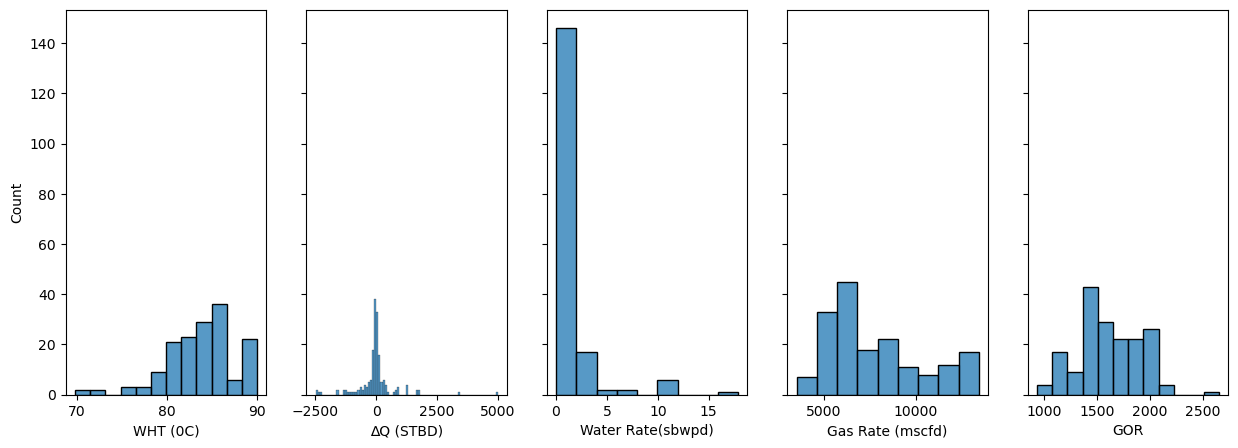

In [138]:
# Distribution of WHT, delta Q, Water Rate,  Gas Rate and GOR  in subplots
import matplotlib.pyplot as plt
fig, axes = plt.subplots(1, 5, figsize=(15, 5), sharey=True)
sns.histplot(df_well1['WHT (0C)'], ax=axes[0])
sns.histplot(df_well1['∆Q (STBD)'], ax=axes[1])
sns.histplot(df_well1['Water Rate(sbwpd)'], ax=axes[2])
sns.histplot(df_well1['Gas Rate (mscfd)'], ax=axes[3])
sns.histplot(df_well1['GOR'], ax=axes[4])



In [139]:
# fill up the null values with mean for WHT, delta Q, Gas rate, GOR and median for Water Rate
df_well1['WHT (0C)'] = df_well1['WHT (0C)'].fillna(df_well1['WHT (0C)'].mean())
df_well1['∆Q (STBD)'] = df_well1['∆Q (STBD)'].fillna(df_well1['∆Q (STBD)'].mean())
df_well1['Water Rate(sbwpd)'] = df_well1['Water Rate(sbwpd)'].fillna(df_well1['Water Rate(sbwpd)'].median())
df_well1['Gas Rate (mscfd)'] = df_well1['Gas Rate (mscfd)'].fillna(df_well1['Gas Rate (mscfd)'].mean())
df_well1['GOR'] = df_well1['GOR'].fillna(df_well1['GOR'].mean())

In [140]:
df_well1.isnull().sum()


Eng. Calender        0
WHT (0C)             0
WHP (psig)           0
Oil Rate (STBD)      0
∆Q (STBD)            0
Water Rate(sbwpd)    0
BS&W                 0
Gas Rate (mscfd)     0
GOR                  0
dtype: int64

In [141]:
#rename all the columns to add _ in between the names and exclude the units and add 'well_1' at the end of each column name
df_well1 = df_well1.rename(columns={'Eng. Calender':'Eng_Calender', 'WHT (0C)':'WHT', 'WHP (psig)':'WHP', 'Oil Rate (STBD)':'Oil_Rate', '∆Q (STBD)':'delta_Q', 'Water Rate(sbwpd)':'Water_Rate', 'Gas Rate (mscfd)':'Gas_Rate'})
df_well1 = df_well1.add_suffix('_well_1')
df_well1.head()

,Eng_Calender_well_1,WHT_well_1,WHP_well_1,Oil_Rate_well_1,delta_Q_well_1,Water_Rate_well_1,BS&W_well_1,Gas_Rate_well_1,GOR_well_1
0,1999-01-19,76.400000,1785.58,7409.0,-15.875706,3.29,0.044386,6936.0,936.158726
1,1999-01-20,83.657051,1683.38,9205.0,1796.000000,0.00,0.000000,9420.0,1023.356871
2,1999-01-21,83.657051,1566.58,10454.0,1249.000000,0.00,0.000000,10812.0,1034.245265
3,1999-01-22,83.657051,1576.80,10006.0,-448.000000,0.00,0.000000,10832.0,1082.550470
4,1999-01-25,83.657051,1575.34,9877.0,-129.000000,0.00,0.000000,10976.0,1111.268604


### Well 2

In [142]:
df_well2.shape

(233, 13)

In [143]:
df_well2.isnull().sum()

Ir. Calender          44
Eng. Calender         27
Choke(/64")          107
WHT (0C)              19
WHP (psig)             0
WHP (barg)            11
Oil Rate (STBD)       11
∆Q (STBD)             12
Water Rate(sbwpd)     16
BS&W                  11
Gas Rate (mscfd)      17
GOR                   12
API                  219
dtype: int64

In [144]:
## since choke and API has null values more than 50% of data we can drop these columns
df_well2 = df_well2.drop(['Choke(/64")','API' ], axis=1)

In [145]:
df_well2.head()

,Ir. Calender,Eng. Calender,WHT (0C),WHP (psig),WHP (barg),Oil Rate (STBD),∆Q (STBD),Water Rate(sbwpd),BS&W,Gas Rate (mscfd),GOR
0,1377/10/29,1999-01-19,79.0,1378.95,95.1,11092.0,NaN,31.95,0.0,8730.6,787.107825
1,1377/10/30,1999-01-20,80.0,1326.75,91.5,11784.0,692.0,0.00,0.0,10063.2,853.971487
2,1377/11/1,1999-01-21,80.0,1338.35,92.3,11637.0,-147.0,0.00,0.0,9968.0,856.578156
3,1377/11/2,1999-01-22,80.0,1363.00,94.0,11305.0,-332.0,0.00,0.0,9763.2,863.617868
4,1377/11/5,1999-01-25,80.0,1138.25,78.5,13307.0,2002.0,0.00,0.0,11945.6,897.692944


In [146]:
#drop unnecessary colunms
df_well2 = df_well2.drop(['Ir. Calender','WHP (barg)'], axis=1)

In [147]:
#select the data until Eng. Calendar is not null
df_well2 = df_well2[df_well2['Eng. Calender'].notnull()]
df_well2

,Eng. Calender,WHT (0C),WHP (psig),Oil Rate (STBD),∆Q (STBD),Water Rate(sbwpd),BS&W,Gas Rate (mscfd),GOR
0,1999-01-19,79.0,1378.95,11092.0,NaN,31.95,0.00,8730.6,787.107825
1,1999-01-20,80.0,1326.75,11784.0,692.0,0.00,0.00,10063.2,853.971487
2,1999-01-21,80.0,1338.35,11637.0,-147.0,0.00,0.00,9968.0,856.578156
3,1999-01-22,80.0,1363.00,11305.0,-332.0,0.00,0.00,9763.2,863.617868
4,1999-01-25,80.0,1138.25,13307.0,2002.0,0.00,0.00,11945.6,897.692944
...,...,...,...,...,...,...,...,...,...
201,2008-04-01,84.4,1758.85,3966.0,6.0,24.00,0.60,4975.0,1254.412506
202,2008-06-01,84.9,1744.35,3950.0,-16.0,12.00,0.30,5064.0,1282.025316
203,2008-08-02,85.3,1726.95,3984.0,34.0,6.00,0.15,4275.0,1073.042169
204,2008-09-03,85.3,1718.25,3954.0,-30.0,24.00,0.60,4290.0,1084.977238


In [148]:
df_well2.isnull().sum()

Eng. Calender        0
WHT (0C)             8
WHP (psig)           0
Oil Rate (STBD)      0
∆Q (STBD)            1
Water Rate(sbwpd)    0
BS&W                 0
Gas Rate (mscfd)     1
GOR                  1
dtype: int64

<Axes: xlabel='Gas Rate (mscfd)', ylabel='Count'>

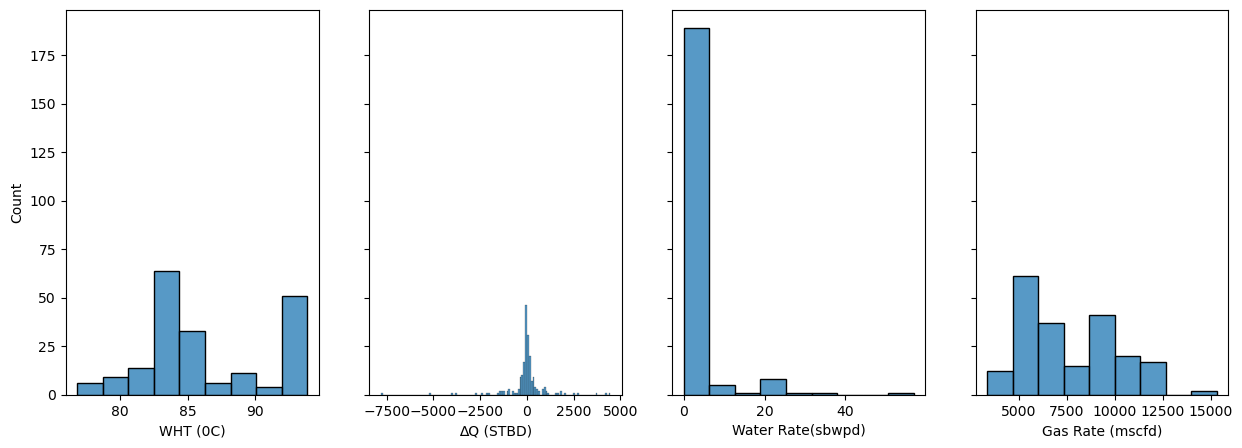

In [149]:
# Distribution of WHT, delta Q, Water Rate,  Gas Rate  in subplots
fig, axes = plt.subplots(1, 4, figsize=(15, 5), sharey=True)
sns.histplot(df_well2['WHT (0C)'], ax=axes[0])
sns.histplot(df_well2['∆Q (STBD)'], ax=axes[1])
sns.histplot(df_well2['Water Rate(sbwpd)'], ax=axes[2])
sns.histplot(df_well2['Gas Rate (mscfd)'], ax=axes[3])

In [150]:
# fill up the null values with mean for delta Q, Gas rate and median for Water Rate, WHT
df_well2['∆Q (STBD)'] = df_well2['∆Q (STBD)'].fillna(df_well2['∆Q (STBD)'].mean())
df_well2['Gas Rate (mscfd)'] = df_well2['Gas Rate (mscfd)'].fillna(df_well2['Gas Rate (mscfd)'].mean())
df_well2['WHT (0C)'] = df_well2['WHT (0C)'].fillna(df_well2['WHT (0C)'].median())
df_well2['Water Rate(sbwpd)'] = df_well2['Water Rate(sbwpd)'].fillna(df_well2['Water Rate(sbwpd)'].median())
df_well2['GOR'] = df_well2['GOR'].fillna(df_well2['GOR'].mean())


In [151]:
df_well2.isnull().sum()

Eng. Calender        0
WHT (0C)             0
WHP (psig)           0
Oil Rate (STBD)      0
∆Q (STBD)            0
Water Rate(sbwpd)    0
BS&W                 0
Gas Rate (mscfd)     0
GOR                  1
dtype: int64

In [152]:
#rename all the columns to add _ in between the names and exclude the units and add 'well_1' at the end of each column name
df_well2 = df_well2.rename(columns={'Eng. Calender':'Eng_Calender', 'WHT (0C)':'WHT', 'WHP (psig)':'WHP', 'Oil Rate (STBD)':'Oil_Rate', '∆Q (STBD)':'delta_Q', 'Water Rate(sbwpd)':'Water_Rate', 'Gas Rate (mscfd)':'Gas_Rate'})
df_well2 = df_well2.add_suffix('_well_2')
df_well2.head()

,Eng_Calender_well_2,WHT_well_2,WHP_well_2,Oil_Rate_well_2,delta_Q_well_2,Water_Rate_well_2,BS&W_well_2,Gas_Rate_well_2,GOR_well_2
0,1999-01-19,79.0,1378.95,11092.0,-34.804878,31.95,0.0,8730.6,787.107825
1,1999-01-20,80.0,1326.75,11784.0,692.000000,0.00,0.0,10063.2,853.971487
2,1999-01-21,80.0,1338.35,11637.0,-147.000000,0.00,0.0,9968.0,856.578156
3,1999-01-22,80.0,1363.00,11305.0,-332.000000,0.00,0.0,9763.2,863.617868
4,1999-01-25,80.0,1138.25,13307.0,2002.000000,0.00,0.0,11945.6,897.692944


### Well 3

In [153]:
df_well3.shape

(217, 13)

In [154]:
df_well3.isnull().sum()

Ir. Calender          47
Eng. Calender         39
Choke(/64")          109
WHT (0C)              28
WHP (psig)             0
WHP (barg)            18
Oil Rate (STBD)       18
∆Q (STBD)              1
Water Rate(sbwpd)     27
BS&W                  22
Gas Rate (mscfd)      23
GOR                   18
API                  217
dtype: int64

In [155]:
## since choke and API has null values more than 50% of data we can drop these columns
df_well3 = df_well3.drop(['Choke(/64")','API' ], axis=1)

In [156]:
#drop unnecessary colunms
df_well3 = df_well3.drop(['Ir. Calender','WHP (barg)'], axis=1)

In [157]:
#select the data until Eng. Calendar is not null
df_well3 = df_well3[df_well3['Eng. Calender'].notnull()]
df_well3

,Eng. Calender,WHT (0C),WHP (psig),Oil Rate (STBD),∆Q (STBD),Water Rate(sbwpd),BS&W,Gas Rate (mscfd),GOR
0,1999-01-19,74.6,1541.35,7888.0,NaN,8.96,0.113967,5892.0,746.957404
1,1999-01-20,80.0,1442.75,8933.0,1045.0,0.00,0.000000,7174.2,803.112056
2,1999-01-21,80.0,1339.80,9558.0,625.0,0.00,0.000000,7778.4,813.810421
3,1999-01-22,80.0,1370.25,8896.0,-662.0,0.00,0.000000,7457.6,838.309353
4,1999-01-25,80.0,1377.50,8725.0,-171.0,0.00,0.000000,7348.8,842.269341
...,...,...,...,...,...,...,...,...,...
173,2005-12-09,84.3,1173.05,3095.0,4.0,422.00,12.000000,3757.0,1213.893376
174,2006-01-09,84.4,1168.70,3142.0,47.0,388.00,11.000000,3970.0,1178.600000
175,2006-02-06,84.2,1171.60,3156.0,14.0,390.00,11.000000,3896.5,1120.000000
176,2006-03-07,NaN,1170.15,3108.0,-48.0,464.50,13.000000,3676.0,1317.000000


In [158]:
df_well3.isnull().sum()

Eng. Calender        0
WHT (0C)             9
WHP (psig)           0
Oil Rate (STBD)      0
∆Q (STBD)            1
Water Rate(sbwpd)    4
BS&W                 4
Gas Rate (mscfd)     0
GOR                  0
dtype: int64

<Axes: xlabel='BS&W', ylabel='Count'>

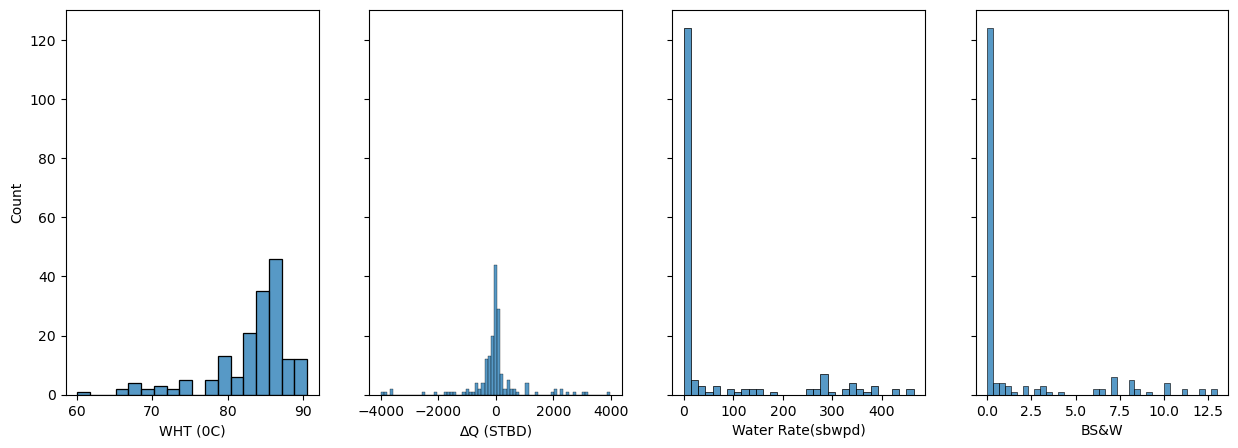

In [161]:
# Distribution of WHT, delta Q, Water Rate,  BS&W  in subplots
fig, axes = plt.subplots(1, 4, figsize=(15, 5), sharey=True)
sns.histplot(df_well3['WHT (0C)'], ax=axes[0])
sns.histplot(df_well3['∆Q (STBD)'], ax=axes[1])
sns.histplot(df_well3['Water Rate(sbwpd)'], ax=axes[2])
sns.histplot(df_well3['BS&W'], ax=axes[3])

In [163]:
# fill up the null values with mean for WHT, delta Q  and median for Water Rate, BS&W
df_well3['∆Q (STBD)'] = df_well3['∆Q (STBD)'].fillna(df_well3['∆Q (STBD)'].mean())
df_well3['WHT (0C)'] = df_well3['WHT (0C)'].fillna(df_well3['WHT (0C)'].mean())
df_well3['Water Rate(sbwpd)'] = df_well3['Water Rate(sbwpd)'].fillna(df_well3['Water Rate(sbwpd)'].median())
df_well3['BS&W'] = df_well3['BS&W'].fillna(df_well3['BS&W'].median())

In [164]:
df_well3.isnull().sum()

Eng. Calender        0
WHT (0C)             0
WHP (psig)           0
Oil Rate (STBD)      0
∆Q (STBD)            0
Water Rate(sbwpd)    0
BS&W                 0
Gas Rate (mscfd)     0
GOR                  0
dtype: int64

In [165]:
#rename all the columns to add _ in between the names and exclude the units and add 'well_1' at the end of each column name
df_well3 = df_well3.rename(columns={'Eng. Calender':'Eng_Calender', 'WHT (0C)':'WHT', 'WHP (psig)':'WHP', 'Oil Rate (STBD)':'Oil_Rate', '∆Q (STBD)':'delta_Q', 'Water Rate(sbwpd)':'Water_Rate', 'Gas Rate (mscfd)':'Gas_Rate'})
df_well3 = df_well3.add_suffix('_well_3')
df_well3.head()

,Eng_Calender_well_3,WHT_well_3,WHP_well_3,Oil_Rate_well_3,delta_Q_well_3,Water_Rate_well_3,BS&W_well_3,Gas_Rate_well_3,GOR_well_3
0,1999-01-19,74.6,1541.35,7888.0,-27.112994,8.96,0.113967,5892.0,746.957404
1,1999-01-20,80.0,1442.75,8933.0,1045.000000,0.00,0.000000,7174.2,803.112056
2,1999-01-21,80.0,1339.80,9558.0,625.000000,0.00,0.000000,7778.4,813.810421
3,1999-01-22,80.0,1370.25,8896.0,-662.000000,0.00,0.000000,7457.6,838.309353
4,1999-01-25,80.0,1377.50,8725.0,-171.000000,0.00,0.000000,7348.8,842.269341


### Well 4